In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
df = pd.read_csv('./data/onion.csv')

In [8]:
df.columns
df = df.drop(['Unnamed: 0', 'DISTRICT', 'MARKET', 'COMMODITY', 'VARIETY', 'GRADE',
       'MIN', 'MAX'], axis= 1)

In [9]:
df['DATE'] = df['DATE'].apply(lambda x: datetime.strptime(x, "%d %b %Y"))
df = df.set_index("DATE")
df['MODAL'] = df['MODAL'].apply(lambda x: int(x))

In [10]:
Interpolated_df = df.resample('1D').interpolate(mehod= "linear")

In [11]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

/home/siram/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/home/siram/anaconda3/lib/python3.7/site-packages/statsmodels/compat/pandas.py:23: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


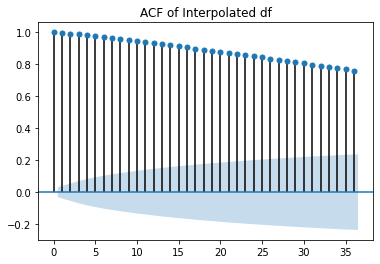

In [12]:
plot_acf(Interpolated_df, title= "ACF of Interpolated df")
plt.show()

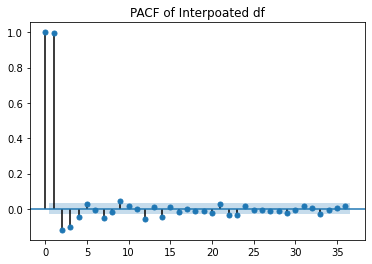

In [13]:
plot_pacf(Interpolated_df, title= "PACF of Interpoated df")
plt.show()

Model Fitting Time: 4.696089267730713
                                 Statespace Model Results                                
Dep. Variable:                             MODAL   No. Observations:                 3645
Model:             SARIMAX(2, 0, 2)x(1, 0, 0, 7)   Log Likelihood              -21206.514
Date:                           Sun, 15 Nov 2020   AIC                          42425.029
Time:                                   21:43:40   BIC                          42462.236
Sample:                               01-01-2010   HQIC                         42438.280
                                    - 12-24-2019                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.4310      0.070     20.527      0.000       1.294       1.568
ar.L2

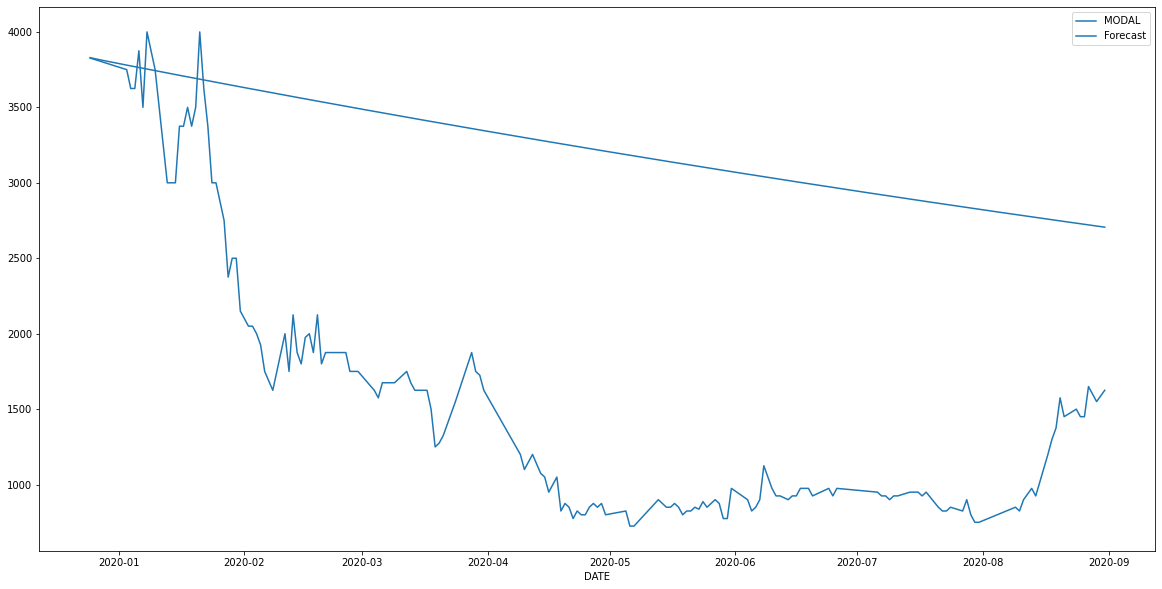

In [14]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from time import time
import numpy as np
import seaborn as sns
train_data = Interpolated_df.iloc[:3645]
test_data = Interpolated_df.iloc[3645:]
p= 2
q= 2
d= 0
S= 7
P= 1
Q= 0
D= 0
model = SARIMAX(train_data, order= (p,d,q), seasonal_order= (P,D,Q,S), freq='D')
#fit the model
start = time()
model_fit = model.fit()
end = time()
print('Model Fitting Time:', end - start)
print(model_fit.summary())
fcast=model_fit.predict('2019-12-24','2020-08-31')
fcast=pd.DataFrame({"Forecast": fcast},index=test_data.index)
residuals = test_data.values - fcast.values
print(f'Root Mean Squared Error for {(p,d,q)},{(P,D,Q,S)}: is ', np.sqrt(np.mean(residuals**2)))
fig, axes = plt.subplots(figsize= (20,10))
sns.lineplot(data= test_data, color='red')
sns.lineplot(data= fcast)
plt.show()